# Question 1

In [1]:
# Step - 1: Importing necessary libraries
import pandas as pd
import numpy as np

In [2]:
# Steps - 2 & 3: Data import and storage
url = r'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user'
users = pd.read_csv(url, delimiter='|')
users.head()

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [3]:
# Step - 4: Discover what is the mean age per occupation
users.groupby(['occupation'])['age'].mean()

occupation
administrator    38.746835
artist           31.392857
doctor           43.571429
educator         42.010526
engineer         36.388060
entertainment    29.222222
executive        38.718750
healthcare       41.562500
homemaker        32.571429
lawyer           36.750000
librarian        40.000000
marketing        37.615385
none             26.555556
other            34.523810
programmer       33.121212
retired          63.071429
salesman         35.666667
scientist        35.548387
student          22.081633
technician       33.148148
writer           36.311111
Name: age, dtype: float64

In [4]:
# Step - 5: Discover the Male ratio per occupation and sort it from the most to the least
male_users = users[users.gender=='M'].groupby(['occupation'])['gender'].agg('count')
total_users = users.groupby(['occupation'])['user_id'].agg('count')
(male_users/total_users).sort_values(ascending=False)

occupation
doctor           1.000000
engineer         0.970149
technician       0.962963
retired          0.928571
programmer       0.909091
executive        0.906250
scientist        0.903226
entertainment    0.888889
lawyer           0.833333
salesman         0.750000
educator         0.726316
student          0.693878
other            0.657143
marketing        0.615385
writer           0.577778
none             0.555556
administrator    0.544304
artist           0.535714
librarian        0.431373
healthcare       0.312500
homemaker        0.142857
dtype: float64

In [5]:
# Step - 6: For each occupation, calculate the minimum and maximum ages
users.groupby(['occupation'])['age'].agg(['min', 'max'])

,min,max
occupation,,
administrator,21,70
artist,19,48
doctor,28,64
educator,23,63
engineer,22,70
entertainment,15,50
executive,22,69
healthcare,22,62
homemaker,20,50


In [6]:
# Step - 7: For each combination of occupation and sex, calculate the mean age
users.groupby(['occupation', 'gender'])['age'].mean()

occupation     gender
administrator  F         40.638889
               M         37.162791
artist         F         30.307692
               M         32.333333
doctor         M         43.571429
educator       F         39.115385
               M         43.101449
engineer       F         29.500000
               M         36.600000
entertainment  F         31.000000
               M         29.000000
executive      F         44.000000
               M         38.172414
healthcare     F         39.818182
               M         45.400000
homemaker      F         34.166667
               M         23.000000
lawyer         F         39.500000
               M         36.200000
librarian      F         40.000000
               M         40.000000
marketing      F         37.200000
               M         37.875000
none           F         36.500000
               M         18.600000
other          F         35.472222
               M         34.028986
programmer     F         32.16666

In [7]:
# Step - 8: For each occupation present the percentage of women and men
male_users = users[users.gender=='M'].groupby(['occupation'])['gender'].agg('count')
female_users = users[users.gender=='F'].groupby(['occupation'])['gender'].agg('count')
total_users = users.groupby(['occupation'])['user_id'].agg('count')

gender_stats = pd.concat([male_users, female_users, total_users], axis=1)
gender_stats.columns = ['male_users', 'female_users', 'total_users']
gender_stats.fillna(0, inplace=True)

gender_stats['percent_of_women'] = gender_stats["female_users"]*100/gender_stats["total_users"]
gender_stats['percent_of_men'] = gender_stats["male_users"]*100/gender_stats["total_users"]
gender_stats[['percent_of_women', 'percent_of_men']]

,percent_of_women,percent_of_men
occupation,,
administrator,45.569620,54.430380
artist,46.428571,53.571429
doctor,0.000000,100.000000
educator,27.368421,72.631579
engineer,2.985075,97.014925
entertainment,11.111111,88.888889
executive,9.375000,90.625000
healthcare,68.750000,31.250000
homemaker,85.714286,14.285714


# Question 2

In [8]:
# Step - 1: Importing the necessary libraries
import pandas as pd
import numpy as np

In [9]:
# Steps - 2 & 3: Data import and storage
url = r'https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv'
euro12 = pd.read_csv(url, delimiter=',')
euro12.head()

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,13,81.3%,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,10,66.7%,25,38,8,4,0,7,7,15
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,22,88.1%,43,45,6,5,0,11,11,16
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,6,54.6%,36,51,5,6,0,11,11,19


In [10]:
# Steps - 4: Selecting only the Goal column
euro12[['Goals']]

,Goals
0,4
1,4
2,4
3,5
4,3
5,10
6,5
7,6
8,2
9,2


In [11]:
# Steps - 5: How many team participated in the Euro2012?
euro12['Team'].nunique()

16

In [12]:
# Step 6. What is the number of columns in the dataset?
len(euro12.columns)

35

In [13]:
# Step 7. View only the columns Team, Yellow Cards and Red Cards
# and assign them to a dataframe called discipline
print(euro12[['Team', 'Yellow Cards', 'Red Cards']])
discipline = euro12[['Team', 'Yellow Cards', 'Red Cards']]

                   Team  Yellow Cards  Red Cards
0               Croatia             9          0
1        Czech Republic             7          0
2               Denmark             4          0
3               England             5          0
4                France             6          0
5               Germany             4          0
6                Greece             9          1
7                 Italy            16          0
8           Netherlands             5          0
9                Poland             7          1
10             Portugal            12          0
11  Republic of Ireland             6          1
12               Russia             6          0
13                Spain            11          0
14               Sweden             7          0
15              Ukraine             5          0


In [14]:
# Step 8. Sort the teams by Red Cards, then to Yellow Cards
discipline = discipline.sort_values(['Red Cards', 'Yellow Cards']) # ascending sort
discipline.head(20)

,Team,Yellow Cards,Red Cards
2,Denmark,4,0
5,Germany,4,0
3,England,5,0
8,Netherlands,5,0
15,Ukraine,5,0
4,France,6,0
12,Russia,6,0
1,Czech Republic,7,0
14,Sweden,7,0
0,Croatia,9,0


In [15]:
# Step 9. Calculate the mean Yellow Cards given per Team
discipline.groupby(['Team'])['Yellow Cards'].mean()

Team
Croatia                 9.0
Czech Republic          7.0
Denmark                 4.0
England                 5.0
France                  6.0
Germany                 4.0
Greece                  9.0
Italy                  16.0
Netherlands             5.0
Poland                  7.0
Portugal               12.0
Republic of Ireland     6.0
Russia                  6.0
Spain                  11.0
Sweden                  7.0
Ukraine                 5.0
Name: Yellow Cards, dtype: float64

In [16]:
# Step 10. Filter teams that scored more than 6 goals
euro12[euro12.Goals > 6]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
13,Spain,12,42,33,55.9%,16.0%,100,0,1,0,...,15,93.8%,102,83,19,11,0,17,17,18


In [17]:
# Step 11. Select the teams that start with G
euro12[euro12.Team.str[0] == 'G']

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20


In [18]:
# Step 12. Select the first 7 columns
euro12.iloc[:, :7]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked)
0,Croatia,4,13,12,51.9%,16.0%,32
1,Czech Republic,4,13,18,41.9%,12.9%,39
2,Denmark,4,10,10,50.0%,20.0%,27
3,England,5,11,18,50.0%,17.2%,40
4,France,3,22,24,37.9%,6.5%,65
5,Germany,10,32,32,47.8%,15.6%,80
6,Greece,5,8,18,30.7%,19.2%,32
7,Italy,6,34,45,43.0%,7.5%,110
8,Netherlands,2,12,36,25.0%,4.1%,60
9,Poland,2,15,23,39.4%,5.2%,48


In [19]:
# Step 13. Select all columns except the last 3
euro12.iloc[:, :-3]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Clean Sheets,Blocks,Goals conceded,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,0,10,3,13,81.3%,41,62,2,9,0
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,1,10,6,9,60.1%,53,73,8,7,0
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,1,10,5,10,66.7%,25,38,8,4,0
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,2,29,3,22,88.1%,43,45,6,5,0
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,1,7,5,6,54.6%,36,51,5,6,0
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,1,11,6,10,62.6%,63,49,12,4,0
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,1,23,7,13,65.1%,67,48,12,9,1
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,2,18,7,20,74.1%,101,89,16,16,0
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,0,9,5,12,70.6%,35,30,3,5,0
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,0,8,3,6,66.7%,48,56,3,7,1


In [20]:
# Step 14. Present only the Shooting Accuracy from England, Italy and Russia
euro12[euro12.Team.isin(['England','Italy','Russia'])][['Team', 'Shooting Accuracy']]

,Team,Shooting Accuracy
3,England,50.0%
7,Italy,43.0%
12,Russia,22.5%


# Question 3

In [21]:
# Step 1. Import the necessary libraries
import pandas as pd
import numpy as np

In [22]:
# Step 2. Create 3 differents Series, each of length 100, as follows:
# • The first a random number from 1 to 4
# • The second a random number from 1 to 3
# • The third a random number from 10,000 to 30,000

np.random.seed(17)

s1 = pd.Series(np.random.randint(1, 5, size=100))
s2 = pd.Series(np.random.randint(1, 4, size=100))
s3 = pd.Series(np.random.randint(10000, 30001, size=100))

print(f"Series 1: \n{s1.head()}")
print(f"Series 2: \n{s2.head()}")
print(f"Series 3: \n{s3.head()}")

Series 1: 
0    4
1    2
2    4
3    3
4    3
dtype: int64
Series 2: 
0    2
1    2
2    2
3    3
4    2
dtype: int64
Series 3: 
0    21778
1    17272
2    14847
3    26136
4    18214
dtype: int64


In [23]:
# Step 3. Create a DataFrame by joinning the Series by column
df = pd.concat([s1, s2, s3], axis=1)
df.head()

,0,1,2
0,4,2,21778
1,2,2,17272
2,4,2,14847
3,3,3,26136
4,3,2,18214


In [24]:
# Step 4. Change the name of the columns to bedrs, bathrs, price_sqr_meter
df.columns = ['bedrs', 'bathrs', 'price_sqr_meter']
df.head()

,bedrs,bathrs,price_sqr_meter
0,4,2,21778
1,2,2,17272
2,4,2,14847
3,3,3,26136
4,3,2,18214


In [25]:
# Step 5. Create a one column DataFrame with the values
# of the 3 Series and assign it to 'bigcolumn'
df1 = pd.DataFrame(pd.concat([s1, s2, s3], axis=0), columns=['bigcolumn'])
df1.head()

,bigcolumn
0,4
1,2
2,4
3,3
4,3


In [26]:
# Step 6. Ops it seems it is going only until index 99. Is it true?
df1.tail()

,bigcolumn
95,29943
96,29427
97,17636
98,28966
99,25790


In [27]:
len(df1)

300

**The last index shown here is 99, which came from the last row of the 3rd series. This isn't true since the entire dataframe has 100 times 3 = 300 rows, and hence the last index should be 299.**

In [28]:
# Step 7. Reindex the DataFrame so it goes from 0 to 299
df1.reset_index(inplace=True, drop=True)
df1.tail()

,bigcolumn
295,29943
296,29427
297,17636
298,28966
299,25790


# Question 4

In [29]:
# Step 1. Import the necessary libraries
import pandas as pd
import numpy as np

In [30]:
# Step 2. Import the dataset from the attached file wind.txt
pd.read_csv('wind.txt', sep=' ')

,Yr,Mo,Dy,Unnamed: 3,Unnamed: 4,RPT,Unnamed: 6,Unnamed: 7,VAL,Unnamed: 9,...,MUL,Unnamed: 30,Unnamed: 31,CLO,Unnamed: 33,Unnamed: 34,BEL,Unnamed: 36,Unnamed: 37,MAL
0,61,NaN,1.0,NaN,1.00,15.04,14.96,13.17,NaN,9.29,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,61,NaN,1.0,NaN,2.00,14.71,NaN,NaN,NaN,10.83,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,61,NaN,1.0,NaN,3.00,18.50,16.88,12.33,10.13,11.17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,61,NaN,1.0,NaN,4.00,10.58,NaN,6.63,11.75,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,61,NaN,1.0,NaN,5.00,13.33,13.25,11.42,NaN,6.17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6569,78,12.0,27.0,17.58,16.96,17.62,NaN,8.08,13.21,11.67,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6570,78,12.0,28.0,13.21,NaN,5.46,13.46,NaN,5.00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6571,78,12.0,29.0,14.00,10.29,14.42,NaN,8.71,NaN,9.71,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6572,78,12.0,30.0,18.50,14.04,21.29,NaN,9.13,12.75,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Since the text file is not delimited evenly, reading it using pandas will give the above dataframe, which can be observed as incorrect. Hence proceeding with another approach to read the lines into a dataframe.**

In [31]:
# Step 2 - corrected. Import the dataset from the attached file wind.txt
# Step 3. Assign it to a variable called data and replace the
# first 3 columns by a proper datetime index.
with open('wind.txt', 'r') as f:
  lines = f.readlines()
data = pd.DataFrame([line.split() for line in lines[1:]], columns=lines[0].split())
data = data.replace('NaN', np.NaN)
data = data.astype(float)
data.head()

,Yr,Mo,Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,61.0,1.0,1.0,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,61.0,1.0,2.0,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,61.0,1.0,3.0,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,61.0,1.0,4.0,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,61.0,1.0,5.0,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83


In [32]:
data.Yr.unique()

array([61., 62., 63., 64., 65., 66., 67., 68., 69., 70., 71., 72., 73.,
       74., 75., 76., 77., 78.])

In [33]:
# Step 4. Year 2061? Do we really have data from this year?
# Create a function to fix it and apply it.
def fix_year(yr):
  return('19' + str(yr))

data['Yr'] = data['Yr'].apply(fix_year)
data.Yr.unique()

array(['1961.0', '1962.0', '1963.0', '1964.0', '1965.0', '1966.0',
       '1967.0', '1968.0', '1969.0', '1970.0', '1971.0', '1972.0',
       '1973.0', '1974.0', '1975.0', '1976.0', '1977.0', '1978.0'],
      dtype=object)

In [34]:
# Step 5a. Set the right dates as the index.
data.rename(columns={"Yr": "year", "Mo": "month", "Dy": "day"}, inplace=np.True_)
data.set_index(pd.to_datetime(data[['year', 'month', 'day']]), inplace=True)
data.drop(['year', 'month', 'day'], axis=1, inplace=True)
data.head()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1961-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
1961-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
1961-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
1961-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83


In [35]:
# Step 5b. Pay attention at the data type, it should be datetime64[ns].
data.index

DatetimeIndex(['1961-01-01', '1961-01-02', '1961-01-03', '1961-01-04',
               '1961-01-05', '1961-01-06', '1961-01-07', '1961-01-08',
               '1961-01-09', '1961-01-10',
               ...
               '1978-12-22', '1978-12-23', '1978-12-24', '1978-12-25',
               '1978-12-26', '1978-12-27', '1978-12-28', '1978-12-29',
               '1978-12-30', '1978-12-31'],
              dtype='datetime64[ns]', length=6574, freq=None)

In [36]:
# Step 6. Compute how many values are missing for each location
# over the entire record.They should be ignored in all calculations below.
data.isna().sum()

RPT    6
VAL    3
ROS    2
KIL    5
SHA    2
BIR    0
DUB    3
CLA    2
MUL    3
CLO    1
BEL    0
MAL    4
dtype: int64

In [37]:
print("Before dropping na: ", data.shape)
data_wo_na = data.dropna(axis=0)
print("After dropping na: ", data_wo_na.shape)

Before dropping na:  (6574, 12)
After dropping na:  (6546, 12)


In [38]:
# Step 7. Compute how many non-missing values there are in total.
data.notna().sum().sum()

78857

In [39]:
# Step 8. Calculate the mean windspeeds of the windspeeds over
# all the locations and all the times.
data_wo_na.mean(axis=0).mean()

10.222465245951726

In [40]:
# Step 9. Create a DataFrame called loc_stats and
# calculate the min, max and mean windspeeds and standard
# deviations of the windspeeds at each location over all the days
min_stats =  data_wo_na.min(axis=0)
max_stats =  data_wo_na.max(axis=0)
mean_stats =  data_wo_na.mean(axis=0)
std_stats = data_wo_na.std(axis=0)
loc_stats = pd.concat([min_stats, max_stats, mean_stats, std_stats],
                      axis=1)
loc_stats.reset_index(drop=False, inplace=True)
loc_stats.columns = ['location', 'min', 'max', 'mean', 'standard_deviation']
loc_stats.head()

,location,min,max,mean,standard_deviation
0,RPT,0.67,35.80,12.359979,5.618805
1,VAL,0.21,33.37,10.640267,5.268695
2,ROS,1.50,33.84,11.656396,5.007805
3,KIL,0.00,28.46,6.298587,3.600942
4,SHA,0.13,37.54,10.448923,4.933988


In [41]:
# Step 10. Create a DataFrame called day_stats and
# calculate the min, max and mean windspeed and standard
# deviations of the windspeeds across all the locations at each day.
min_stats =  data_wo_na.min(axis=1)
max_stats =  data_wo_na.max(axis=1)
mean_stats =  data_wo_na.mean(axis=1)
std_stats = data_wo_na.std(axis=1)
day_stats = pd.concat([min_stats, max_stats, mean_stats, std_stats],
                      axis=1)
day_stats.reset_index(drop=False, inplace=True)
day_stats.columns = ['day', 'min', 'max', 'mean', 'standard_deviation']
day_stats.head()

,day,min,max,mean,standard_deviation
0,1961-01-04,1.79,11.75,6.619167,3.198126
1,1961-01-05,6.17,13.33,10.630000,2.445356
2,1961-01-06,4.42,13.21,8.240000,2.998063
3,1961-01-07,4.96,14.29,10.385000,3.072114
4,1961-01-08,5.91,16.62,10.487500,3.547237


In [42]:
# Step 11. Find the average windspeed in January for each location.
data_wo_na[data_wo_na.index.month==1].mean(axis=0)

RPT    14.831609
VAL    12.885389
ROS    13.276275
KIL     7.152477
SHA    11.644467
BIR     8.030561
DUB    11.788336
CLA     9.486962
MUL     9.511501
CLO    10.024069
BEL    14.527848
MAL    18.041826
dtype: float64

In [43]:
# Step 12. Downsample the record to a yearly frequency for each location.
yearly_sample = data_wo_na.groupby([data_wo_na.index.year]).mean()
yearly_sample

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
1961,12.207588,10.207206,11.282853,6.846441,10.742735,7.617147,9.633265,8.684912,8.571941,9.700471,13.271559,13.587206
1962,12.274779,10.150856,11.714365,6.964337,10.692265,7.415331,11.043122,8.829807,8.335552,9.693812,12.985691,14.361436
1963,12.813452,10.836986,12.541151,7.330055,11.724110,8.434712,11.075699,10.336548,8.903589,10.224438,13.638877,14.999014
1964,12.363661,10.920164,12.104372,6.787787,11.454481,7.570874,10.259153,9.467350,7.789016,10.207951,13.740546,14.910301
1965,12.451370,11.075534,11.848767,6.858466,11.024795,7.478110,10.618712,8.879918,7.907425,9.918082,12.964247,15.591644
1966,13.461973,11.557205,12.020630,7.345726,11.805041,7.793671,10.579808,8.835096,8.514438,9.768959,14.265836,16.307260
1967,12.737151,10.990986,11.739397,7.143425,11.630740,7.368164,10.652027,9.325616,8.645014,9.547425,14.774548,17.135945
1968,11.835628,10.468197,11.409754,6.477678,10.760765,6.067322,8.859180,8.255519,7.224945,7.832978,12.808634,15.017486
1969,11.166356,9.723699,10.902000,5.767973,9.873918,6.189973,8.564493,7.711397,7.924521,7.754384,12.621233,15.762904
1970,12.600329,10.726932,11.730247,6.217178,10.567370,7.609452,9.609890,8.334630,9.297616,8.289808,13.183644,16.456027


In [44]:
# Step 13. Downsample the record to a monthly frequency for each location.
monthly_sample = data_wo_na.groupby([data_wo_na.index.year, data_wo_na.index.month]).mean()
monthly_sample.reset_index(drop=False, inplace=True)
monthly_sample['yyyy-mm'] = monthly_sample['level_0'].astype(str) + " - " + monthly_sample['level_1'].astype(str)
monthly_sample.set_index(monthly_sample['yyyy-mm'], inplace=True)
monthly_sample.drop(['yyyy-mm', 'level_0', 'level_1'], axis=1, inplace=True)

monthly_sample.head()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
yyyy-mm,,,,,,,,,,,,
1961 - 1,14.506154,11.225385,12.960385,6.840000,10.509231,8.174231,10.403077,8.670769,8.323462,9.490385,13.270000,14.341538
1961 - 2,16.401923,15.037308,14.470000,9.242692,13.778077,10.884615,11.868077,11.746154,11.748462,12.626538,18.165000,15.300769
1961 - 3,10.660000,11.097407,10.420000,7.100741,10.265556,8.580000,9.108519,9.329259,10.100000,10.989630,16.066296,15.418889
1961 - 4,10.722667,9.427667,9.998000,5.830667,8.435000,6.495000,6.925333,7.094667,7.342333,7.237000,11.147333,10.278333
1961 - 5,10.024643,8.495714,10.539286,5.992500,9.480357,6.633929,7.645714,8.206786,8.120714,8.534643,11.912143,11.911786


In [45]:
# Step 14. Downsample the record to a weekly frequency for each location.
weekly_sample = data_wo_na.groupby([data_wo_na.index.year, data_wo_na.index.week]).mean()
weekly_sample.reset_index(drop=False, inplace=True)
weekly_sample['yyyy-ww'] = weekly_sample['level_0'].astype(str) + " - " + weekly_sample['level_1'].astype(str)
weekly_sample.set_index(weekly_sample['yyyy-ww'], inplace=True)
weekly_sample.drop(['yyyy-ww', 'level_0', 'level_1'], axis=1, inplace=True)

weekly_sample.head()

<ipython-input-45-d667297048e3>:2: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  weekly_sample = data_wo_na.groupby([data_wo_na.index.year, data_wo_na.index.week]).mean()


,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
yyyy-ww,,,,,,,,,,,,
1961 - 1,12.316000,10.408000,10.050000,5.658000,8.506000,6.242000,10.936000,5.932000,8.150000,8.428000,11.416000,13.226000
1961 - 2,12.468571,8.967143,11.958571,4.630000,7.351429,5.072857,7.535714,6.820000,5.712857,7.571429,11.125714,11.024286
1961 - 3,12.100000,9.500000,11.681667,4.293333,8.966667,6.938333,7.828333,7.291667,5.891667,6.693333,9.993333,10.346667
1961 - 4,19.880000,14.846667,17.548333,11.916667,16.325000,14.016667,14.450000,14.311667,13.316667,14.921667,19.800000,22.388333
1961 - 5,16.827143,15.460000,12.618571,8.247143,13.361429,9.107143,12.204286,8.548571,9.821429,9.460000,14.012857,11.935714


In [46]:
# Step 15. Calculate the min, max and mean windspeeds and standard deviations of the
# windspeeds across all locations for each week (assume that the first week starts on
# January 2 1961) for the first 52 weeks.

# Since data_wo_na (data set used to create weekly_sample) does not contain
# the date before Jan 2, 1961, we can proceed without any further filtering.

min_stats =  weekly_sample.min(axis=1)
max_stats =  weekly_sample.max(axis=1)
mean_stats =  weekly_sample.mean(axis=1)
std_stats = weekly_sample.std(axis=1)
weekly_stats = pd.concat([min_stats, max_stats, mean_stats, std_stats],
                      axis=1)
weekly_stats.reset_index(drop=False, inplace=True)
weekly_stats.columns = ['week', 'min', 'max', 'mean', 'standard_deviation']
weekly_stats = weekly_stats.head(52) # restricting for the first 52 weeks
weekly_stats

,week,min,max,mean,standard_deviation
0,1961 - 1,5.658000,13.226000,9.272333,2.524731
1,1961 - 2,4.630000,12.468571,8.353214,2.719649
2,1961 - 3,4.293333,12.100000,8.460417,2.374786
3,1961 - 4,11.916667,22.388333,16.143472,3.135060
4,1961 - 5,8.247143,16.827143,11.800357,2.807310
5,1961 - 6,10.774286,21.832857,15.891548,3.147412
6,1961 - 7,9.530000,19.756667,13.558056,2.727766
7,1961 - 8,8.524286,16.304286,12.604286,2.364323
8,1961 - 9,7.900000,17.174000,11.375000,2.565906
9,1961 - 10,5.175000,16.068333,9.820000,2.805490


# Question 5

In [47]:
# Step 1. Import the necessary libraries
import pandas as pd
import numpy as np

In [48]:
# Steps - 2 & 3: Data import and storage
url = r'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv'
chipo = pd.read_csv(url, delimiter='\t')
chipo.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


In [49]:
# Step 4. See the first 10 entries
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


In [50]:
# Step 5. What is the number of observations in the dataset?
len(chipo)

4622

In [51]:
# Step 6. What is the number of columns in the dataset?
chipo.shape[1]

5

In [52]:
# Step 7. Print the name of all the columns.
for c in chipo.columns:
  print(c)

order_id
quantity
item_name
choice_description
item_price


In [53]:
# Step 8. How is the dataset indexed?
chipo.index

RangeIndex(start=0, stop=4622, step=1)

It is indexed from 0 to 4621, which can be represented as RangeIndex(start=0, stop=4622, step=1).

In [54]:
# Step 9. Which was the most-ordered item?
chipo.groupby(['item_name'])['quantity'].sum().sort_values(ascending=False).index[0]

'Chicken Bowl'

In [55]:
# Step 10. For the most-ordered item, how many items were ordered?
chipo.groupby(['item_name'])['quantity'].sum().sort_values(ascending=False)[0]

761

In [56]:
# Step 11. What was the most ordered item in the choice_description column?
chipo.groupby(['choice_description'])['quantity'].sum().sort_values(ascending=False).index[0]

'[Diet Coke]'

In [57]:
# Step 12. How many items were orderd in total?
chipo['quantity'].sum()

4972

In [58]:
# Step 13a.
# • Turn the item price into a float
chipo['item_price'] = chipo['item_price'].astype(float)
# • Check the item price type
print(chipo['item_price'].dtype)

ValueError: ignored

**Direct casting of item_price to float cannot be done since there is a $ character in front of the price. Hence, we go with the following method of first removing the character and then converting to float.**

In [59]:
# Step 13b.
# • Create a lambda function and change the type of item price
chipo['item_price'] = chipo['item_price'].apply(lambda x: float(x.replace("$", "")))
# • Check the item price type
print(chipo['item_price'].dtype)

float64


In [60]:
# Step 14. How much was the revenue for the period in the dataset?
chipo['item_price'].sum()

34500.16

In [61]:
# Step 15. How many orders were made in the period?
len(chipo['order_id'].drop_duplicates())

1834

In [62]:
# Step 16. What is the average revenue amount per order?
chipo.groupby(['order_id'])['item_price'].sum().mean()

18.811428571428568

In [63]:
# Step 17. How many different items are sold?
len(chipo['item_name'].drop_duplicates())

50

# Question 6

In [64]:
# Create a line plot showing the number of marriages and divorces per capita
#  in the U.S. between 1867 and 2014. Label both lines and show the legend.
# Don't forget to label your axes!

import pandas as pd
import numpy as np

df = pd.read_csv('us-marriages-divorces-1867-2014.csv')
df.head()

,Year,Marriages,Divorces,Population,Marriages_per_1000,Divorces_per_1000
0,1867,357000.0,10000.0,36970000,9.7,0.3
1,1868,345000.0,10000.0,37885000,9.1,0.3
2,1869,348000.0,11000.0,38870000,9.0,0.3
3,1870,352000.0,11000.0,39905000,8.8,0.3
4,1871,359000.0,12000.0,41010000,8.8,0.3


In [65]:
df.Year.min(), df.Year.max()

(1867, 2011)

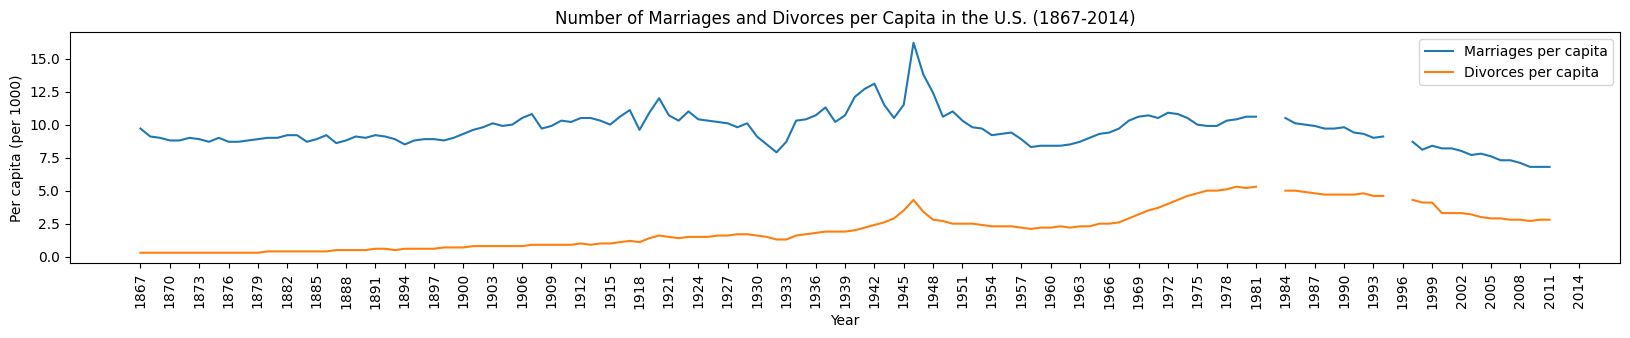

In [66]:
import matplotlib.pyplot as plt
%matplotlib inline

years = list(range(1867, 2015)) # defining the x-axis data

# fetching the per capita info from the dataset, corresponding to each of the mentioned years
marriages_per_capita = []
divorces_per_capita = []
for year in years:
  data = df[df.Year == year][['Marriages_per_1000', 'Divorces_per_1000']].reset_index(drop=True)
  if (len(data)==1):
    marriages_per_capita.append(data.iloc[0, 0])
    divorces_per_capita.append(data.iloc[0, 1])
  elif (len(data)==0):
    marriages_per_capita.append(np.nan)
    divorces_per_capita.append(np.nan)
  else:
    raise(f"Multiple records for {year}")
    break

# figure param set up
plt.rcParams["figure.figsize"] = [20, 3]
fig, ax = plt.subplots()
ax.plot(years, marriages_per_capita, label='Marriages per capita')
ax.plot(years, divorces_per_capita, label='Divorces per capita')
ax.set_title('Number of Marriages and Divorces per Capita in the U.S. (1867-2014)')
ax.set_xlabel('Year')
ax.set_ylabel('Per capita (per 1000)')
plt.xticks([years[i] for i in range(0, len(years), 3)], rotation=90)
ax.legend()
plt.show()

# Question 7

In [67]:
# Create a vertical bar chart comparing the number of
# marriages and divorces per capita in the U.S. between 1900, 1950, and 2000.
# Don't forget to label your axes!

years = [1900, 1950, 2000] # defining the x-axis data

# fetching the per capita info from the dataset, corresponding to each of the mentioned years
marriages_per_capita = []
divorces_per_capita = []
for year in years:
  data = df[df.Year == year][['Marriages_per_1000', 'Divorces_per_1000']].reset_index(drop=True)
  if (len(data)==1):
    marriages_per_capita.append(data.iloc[0, 0])
    divorces_per_capita.append(data.iloc[0, 1])
  elif (len(data)==0):
    marriages_per_capita.append(np.nan)
    divorces_per_capita.append(np.nan)
  else:
    raise(f"Multiple records for {year}")
    break

print(marriages_per_capita, divorces_per_capita)

[9.3, 11.0, 8.2] [0.7, 2.5, 3.3]


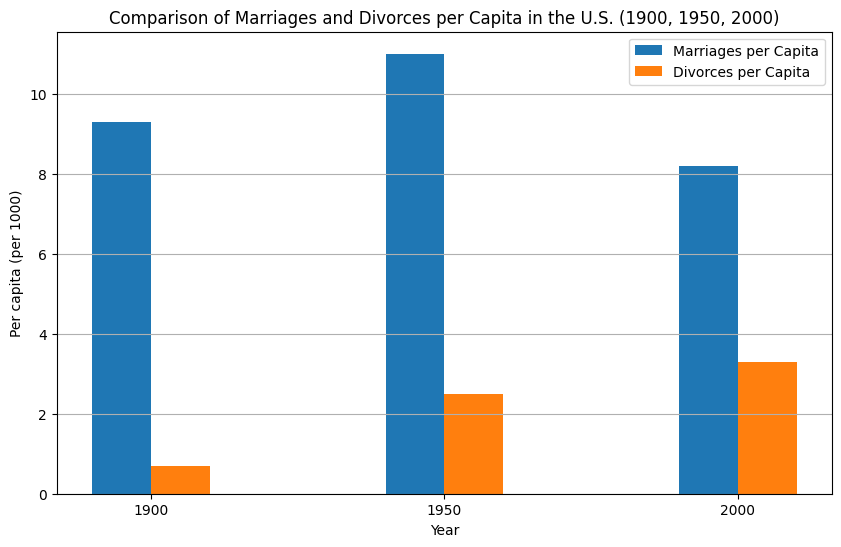

In [68]:
bar_width = 10
bar_positions_marriages = [year - bar_width/2 for year in years]
bar_positions_divorces = [year + bar_width/2 for year in years]

plt.figure(figsize=(10, 6))

plt.bar(bar_positions_marriages, marriages_per_capita, width=bar_width, label='Marriages per Capita')
plt.bar(bar_positions_divorces, divorces_per_capita, width=bar_width, label='Divorces per Capita')

# Adding labels, title, lengend, etc
plt.xlabel('Year')
plt.ylabel('Per capita (per 1000)')
plt.title('Comparison of Marriages and Divorces per Capita in the U.S. (1900, 1950, 2000)')
plt.legend()
plt.xticks(years, ['1900', '1950', '2000'])
plt.grid(axis='y')
plt.show()

# Question 8

In [69]:
# Create a horizontal bar chart that compares the deadliest
# actors in Hollywood. Sort the actors by their kill count and label
# each bar with the corresponding actor's name. Don't forget to label your axes!

df = pd.read_csv('actor_kill_counts.csv')
df.head()

,Actor,Count
0,Arnold Schwarzenegger,369
1,Chow Yun-Fat,295
2,Clint Eastwood,207
3,Clive Owen,194
4,Dolph Lundgren,239


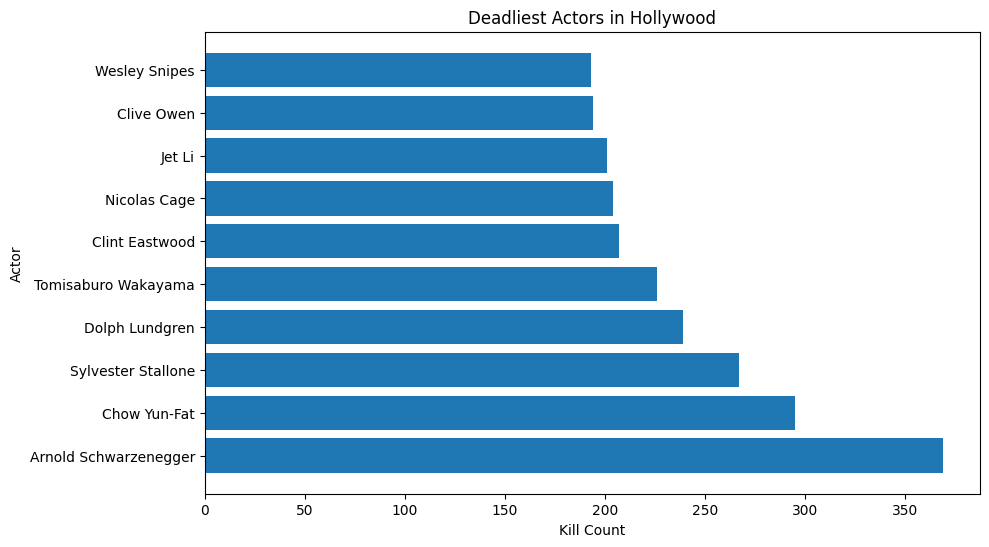

In [70]:
df.sort_values(['Count'], inplace=True, ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(df['Actor'], df['Count'])
plt.xlabel('Kill Count')
plt.ylabel('Actor')
plt.title('Deadliest Actors in Hollywood')
plt.show()

# Question 9

In [71]:
# Create a pie chart showing the fraction of all Roman Emperors that were
# assassinated. Make sure that the pie chart is an even circle, labels
# the categories, and shows the percentage breakdown of the categories.

df = pd.read_csv('roman-emperor-reigns.csv')
df.head()

,Emperor,Length_of_Reign,Cause_of_Death
0,Augustus,40.58,Possibly assassinated
1,Tiberius,22.50,Possibly assassinated
2,Caligula,4.83,Assassinated
3,Claudius,13.75,Possibly assassinated
4,Nero,13.67,Suicide


In [72]:
df.Cause_of_Death.value_counts()

Assassinated             22
Natural causes           16
Possibly assassinated     8
Killed in battle          8
Suicide                   5
Illness                   5
Executed                  3
Died in captivity         1
Name: Cause_of_Death, dtype: int64

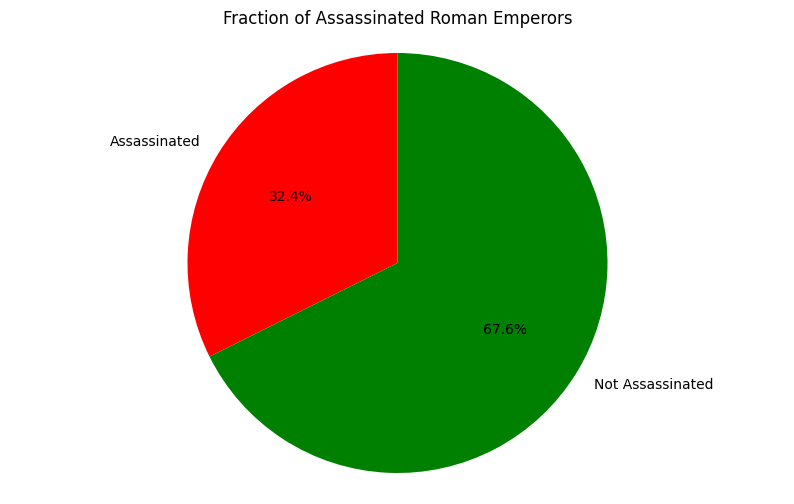

In [73]:
assassinated_count = df[df['Cause_of_Death'] == 'Assassinated'].shape[0]
non_assassinated_count = len(df) - assassinated_count

labels = ['Assassinated', 'Not Assassinated']
sizes = [assassinated_count, non_assassinated_count]

plt.figure(figsize=(10, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['red', 'green'])
plt.axis('equal')
plt.title('Fraction of Assassinated Roman Emperors')
plt.show()

# Question 10

In [74]:
# Create a scatter plot showing the relationship between the total
# revenue earned by arcades and the number of Computer Science PhDs
# awarded in the U.S. between 2000 and 2009. Don't forget to label your axes!
# Color each dot according to its year.

df = pd.read_csv('arcade-revenue-vs-cs-doctorates.csv')
df.head()

,Year,Total Arcade Revenue (billions),Computer Science Doctorates Awarded (US)
0,2000,1.196,861
1,2001,1.176,830
2,2002,1.269,809
3,2003,1.240,867
4,2004,1.307,948


In [75]:
df.columns

Index(['Year', 'Total Arcade Revenue (billions)',
       'Computer Science Doctorates Awarded (US)'],
      dtype='object')

In [76]:
df.Year.unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009])

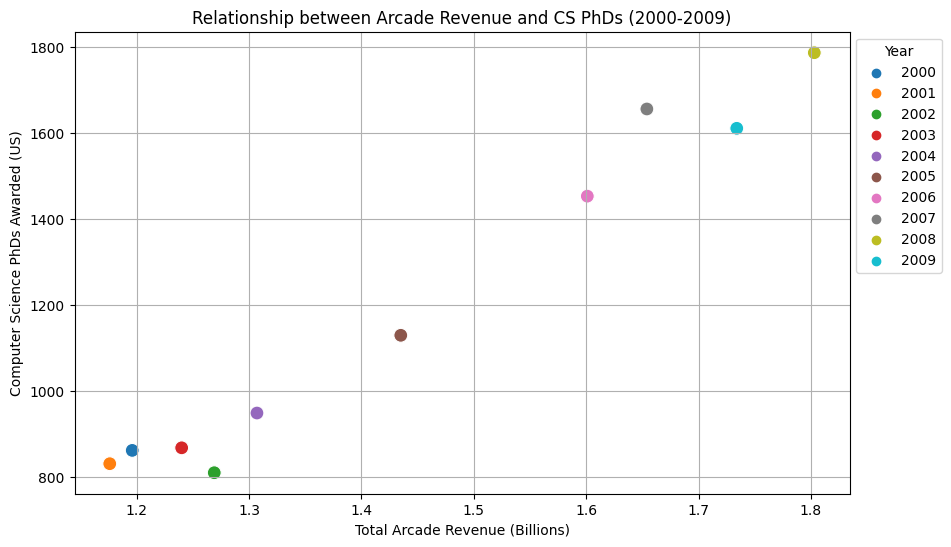

In [77]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Total Arcade Revenue (billions)',
                y='Computer Science Doctorates Awarded (US)',
                hue='Year', data=df, palette='tab10', s=100)

plt.xlabel('Total Arcade Revenue (Billions)')
plt.ylabel('Computer Science PhDs Awarded (US)')
plt.title('Relationship between Arcade Revenue and CS PhDs (2000-2009)')

plt.legend(title='Year', bbox_to_anchor=(1, 1), loc='upper left')
plt.grid(True)
plt.show()